# Tracer correlation coefficients
We want (for testing purposes) to compute correlation coefficients for tracers for several different crystal structures:

* Simple cubic
* Body-centered cubic
* Face-centered cubic
* Diamond
* Wurtzite
* Hexagonal closed-packed
* NbO
* omega
* octahedral-tetrahedral network in HCP

Some are well-known (previously published) others are new.

In [1]:
import sys
sys.path.extend(['../'])
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from onsager import crystal, OnsagerCalc

Create all of our lattices, with lattice constant a0.

In [2]:
a0 = 1.
SC = crystal.Crystal(a0*np.eye(3), [np.array([0.,0.,0.])], ["SC"])
BCC = crystal.Crystal.BCC(a0, ["BCC"])
FCC = crystal.Crystal.FCC(a0, ["FCC"])
diamond = crystal.Crystal(a0*np.array([[0,1/2,1/2],[1/2,0,1/2],[1/2,1/2,0]]), 
                          [np.array([1/8,1/8,1/8]), np.array([-1/8,-1/8,-1/8])], 
                          ["diamond"])
wurtzite = crystal.Crystal(a0*np.array([[1/2,1/2,0],
                                        [-np.sqrt(3/4),np.sqrt(3/4),0.],
                                        [0.,0.,np.sqrt(8/3)]]), 
                           [np.array([1/3,2/3,1/4-3/16]), np.array([1/3,2/3,1/4+3/16]), 
                            np.array([2/3,1/3,3/4-3/16]), np.array([2/3,1/3,3/4+3/16])], 
                           ["wurtzite"])
HCP = crystal.Crystal.HCP(a0, np.sqrt(8/3), ["HCP"])
NbO = crystal.Crystal(a0*np.eye(3),
                      [[np.array([0,1/2,1/2]), np.array([1/2,0,1/2]),np.array([1/2,1/2,0])],
                       [np.array([1/2,0,0]), np.array([0,1/2,0]), np.array([0,0,1/2])]],
                      ['Nb', 'O'])
omega = crystal.Crystal(a0*np.array([[1/2,1/2,0],
                                     [-np.sqrt(3/4),np.sqrt(3/4),0.],
                                     [0.,0.,np.sqrt(3/8)]]), 
                           [np.array([0.,0.,0.]),
                            np.array([1/3,2/3,1/2]), np.array([2/3,1/3,1/2])], 
                           ["omega"])
octtet = crystal.Crystal(a0*np.array([[1/2,1/2,0],
                                      [-np.sqrt(3/4),np.sqrt(3/4),0.],
                                      [0.,0.,np.sqrt(8/3)]]), 
                           [[np.array([0.,0.,0.]), np.array([0.,0.,0.5]), 
                             np.array([1/3,2/3,5/8]), np.array([1/3,2/3,7/8]), 
                             np.array([2/3,1/3,3/8]), np.array([2/3,1/3,1/8])],
                            [np.array([1/3,2/3,1/4]), np.array([2/3,1/3,3/4])]], 
                           ["O", "Ti"])
crystallist = [SC, BCC, FCC, diamond, wurtzite, HCP, NbO, omega, octtet]
crystalnames = ["simple cubic", "body-centered cubic", "face-centered cubic", "diamond", 
                "wurtzite", "hexagonal closed-packed", "NbO", "hexagonal omega", 
                "HCP octahedral-tetrahedral"]

In [3]:
for name, crys in zip(crystalnames, crystallist):
    print(name)
    print(crys)
    print()

simple cubic
#Lattice:
  a1 = [ 1.  0.  0.]
  a2 = [ 0.  1.  0.]
  a3 = [ 0.  0.  1.]
#Basis:
  (SC) 0.0 = [ 0.  0.  0.]

body-centered cubic
#Lattice:
  a1 = [-0.5  0.5  0.5]
  a2 = [ 0.5 -0.5  0.5]
  a3 = [ 0.5  0.5 -0.5]
#Basis:
  (BCC) 0.0 = [ 0.  0.  0.]

face-centered cubic
#Lattice:
  a1 = [ 0.   0.5  0.5]
  a2 = [ 0.5  0.   0.5]
  a3 = [ 0.5  0.5  0. ]
#Basis:
  (FCC) 0.0 = [ 0.  0.  0.]

diamond
#Lattice:
  a1 = [ 0.   0.5  0.5]
  a2 = [ 0.5  0.   0.5]
  a3 = [ 0.5  0.5  0. ]
#Basis:
  (diamond) 0.0 = [ 0.625  0.625  0.625]
  (diamond) 0.1 = [ 0.375  0.375  0.375]

wurtzite
#Lattice:
  a1 = [ 0.5       -0.8660254  0.       ]
  a2 = [ 0.5        0.8660254  0.       ]
  a3 = [ 0.          0.          1.63299316]
#Basis:
  (wurtzite) 0.0 = [ 0.33333333  0.66666667  0.0625    ]
  (wurtzite) 0.1 = [ 0.33333333  0.66666667  0.4375    ]
  (wurtzite) 0.2 = [ 0.66666667  0.33333333  0.5625    ]
  (wurtzite) 0.3 = [ 0.66666667  0.33333333  0.9375    ]

hexagonal closed-packed
#Lattice:


Now we generate diffusers for *every crystal*. This is fairly automated, where the main input is the cutoff distance. 

In [4]:
cutoffs = [1.01*a0, 0.9*a0, 0.75*a0, 0.45*a0, 0.62*a0, 1.01*a0, 0.8*a0, 0.66*a0, 0.71*a0]
diffusers = []
for name, crys, cut in zip(crystalnames, crystallist, cutoffs):
    jn = crys.jumpnetwork(0, cut, 0.01)
    print(name)
    print(' Unique jumps:', len(jn))
    for jlist in jn:
        print('  connectivity:', len([i for (i,j), dx in jlist if i==jlist[0][0][0]]))
    diffusers.append(OnsagerCalc.VacancyMediated(crys, 0, crys.sitelist(0), jn, 1, 6))

simple cubic
 Unique jumps: 1
  connectivity: 6
body-centered cubic
 Unique jumps: 1
  connectivity: 8
face-centered cubic
 Unique jumps: 1
  connectivity: 12
diamond
 Unique jumps: 1
  connectivity: 4
wurtzite
 Unique jumps: 2
  connectivity: 1
  connectivity: 3
hexagonal closed-packed
 Unique jumps: 2
  connectivity: 6
  connectivity: 6
NbO
 Unique jumps: 1
  connectivity: 8
hexagonal omega
 Unique jumps: 4
  connectivity: 2
  connectivity: 12
  connectivity: 2
  connectivity: 3
HCP octahedral-tetrahedral
 Unique jumps: 3
  connectivity: 6
  connectivity: 1
  connectivity: 3


Now run through each, creating the "tracer" and compute the correlation coefficient. We do this by giving all of the vacancy positions the same energy (may not apply for true omega and octahedral-tetrahedral networks, for example), and then assigning the same energy for all transitions (again, may not apply for cases where there is more than one unique jump). We compute the full Onsager matrix, then look at the diagonal of $f=-L_{\mathrm{ss}}/L_{\mathrm{sv}}$.

In [5]:
print('crystal\tf_xx\tf_zz')
for name, diff in zip(crystalnames, diffusers):
    nsites, njumps = len(diff.sitelist), len(diff.om0_jn)
    tdict = {'preV': np.ones(nsites), 'eneV': np.zeros(nsites), 
             'preT0': np.ones(njumps), 'eneT0': np.zeros(njumps)}
    # make a tracer out of it:
    tdict.update(diff.maketracerpreene(**tdict))
    Lss, Lsv = diff.Lij(*diff.preene2betafree(1, **tdict))[1:3]  # just pull out ss and sv
    f = np.diag(-np.dot(Lss, np.linalg.inv(Lsv)))
    print('{name}\t{f[0]:.8f}\t{f[2]:.8f}'.format(name=name, f=f))

crystal	f_xx	f_zz
simple cubic	0.65310884	0.65310884
body-centered cubic	0.72719414	0.72719414
face-centered cubic	0.78145142	0.78145142
diamond	0.50000000	0.50000000
wurtzite	0.50000000	0.50000000
hexagonal closed-packed	0.78120488	0.78145142
NbO	0.68891612	0.68891612
hexagonal omega	0.78122649	0.78157339
HCP octahedral-tetrahedral	0.63052307	0.65230273


Look at variation in correlation coefficient for wurtzite structure by varying the ratio of the two rates.

In [6]:
print('w(c)/w(basal)\tf_xx\tf_zz')
crysindex = crystalnames.index('wurtzite')
diff = diffusers[crysindex]
nsites, njumps = len(diff.sitelist), len(diff.om0_jn)
freq_list, correl_xx_list, correl_zz_list = [], [], []
for i, w0_w1 in enumerate(np.linspace(-2,2,num=33)):
    w0 = 10**(w0_w1)
    w1 = 1
    tdict = {'preV': np.ones(nsites), 'eneV': np.zeros(nsites), 
             'preT0': np.array([w0,w1]), 'eneT0': np.zeros(njumps)}
    # make a tracer out of it:
    tdict.update(diff.maketracerpreene(**tdict))
    Lss, Lsv = diff.Lij(*diff.preene2betafree(1, **tdict))[1:3]  # just pull out ss and sv
    f = np.diag(-np.dot(Lss, np.linalg.inv(Lsv)))
    freq_list.append(w0)
    correl_xx_list.append(f[0])
    correl_zz_list.append(f[2])
    if i%4==0:
        print('10^{w0_w1:+.2f}\t{f[0]:.8f}\t{f[2]:.8f}'.format(w0_w1=w0_w1, f=f))    

w(c)/w(basal)	f_xx	f_zz
10^-2.00	0.34028415	0.97703525
10^-1.50	0.35071960	0.94102894
10^-1.00	0.37474153	0.85697089
10^-0.50	0.42323211	0.69772423
10^+0.00	0.50000000	0.50000000
10^+0.50	0.58129067	0.40813890
10^+1.00	0.63424155	0.45691154
10^+1.50	0.65763077	0.52060064
10^+2.00	0.66602090	0.55182811


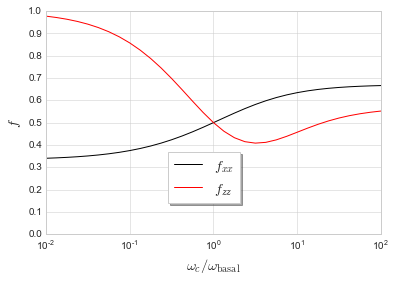

In [7]:
freq, correl_xx, correl_zz = np.array(freq_list), np.array(correl_xx_list), np.array(correl_zz_list)
fig, ax1 = plt.subplots()
ax1.plot(freq, correl_xx, 'k', label='$f_{xx}$')
ax1.plot(freq, correl_zz, 'r', label='$f_{zz}$')
ax1.set_xscale('log')
ax1.set_ylabel('$f$', fontsize='x-large')
ax1.set_xlabel('$\omega_{c}/\omega_{\mathrm{basal}}$', fontsize='x-large')
ax1.set_ylim((0,1))
ax1.set_yticks(np.linspace(0,1,11))
ax1.legend(bbox_to_anchor=(0.4,0.1,0.2,0.3), ncol=1, 
           shadow=True, frameon=True, fontsize='x-large')
plt.show()
# plt.savefig('wurtzite-correlation.pdf', transparent=True, format='pdf')